In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
x= torch.FloatTensor([4])
x.requires_grad=True
w = torch.FloatTensor([2])
w.requires_grad=True
b= torch.FloatTensor([3])
b.requires_grad=True 

y= x*w+b


y.backward()

print("dy/dx:", x.grad.item())
print("dy/dw:", w.grad.item())
print("dy/db:", b.grad.item())

dy/dx: 2.0
dy/dw: 4.0
dy/db: 1.0


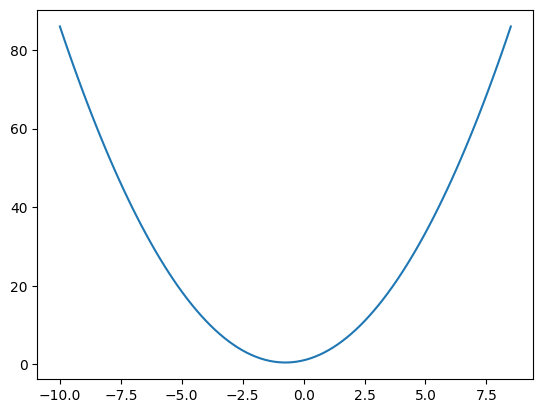

In [5]:
def fx(x):
    return x**2 + 1.5*x + 1

x= np.linspace(-10,8.5,100)

plt.plot(x,fx(x))



In [17]:
x_= torch.randn(1,requires_grad=True)
# x._requires_grad = True

y_= fx(x_)

y_.backward()

dy_dx = x_.grad.item()

print(x_, dy_dx) 


tensor([-1.3504], requires_grad=True) -1.200758457183838


In [28]:
x_= torch.randn(1,requires_grad=True)
x_logger=[]
y_logger=[]


counter= 0

learning_rate = 0.01

dy_dx= 1000

max_steps= 1000


while(np.abs(dy_dx)>0.01):
    
    y_= fx(x_)
    
    y_.backward()
    
    dy_dx= x_.grad.item()
    
    with torch.no_grad():
        
        x_ -= learning_rate*dy_dx
        
        x_.grad.zero_()
        
        x_logger.append(x_.item())
        y_logger.append(y_.item())
        
    counter+=1
    
    
    if counter== max_steps:
        break    

    
print(y_.item(), x_.item(), counter)    

0.43752485513687134 -0.7451134920120239 315
